In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
np.random.seed(7)

In [4]:
img_rows = 28
img_cols = 28

kernel_rows = 3
kernel_cols = 3
num_kernels = 16

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

images, labels = (x_train[0:1000].reshape(1000,28*28) / 255,
                  y_train[0:1000])

one_hot_labels = np.zeros((len(labels),10))
for i,l in enumerate(labels):
    one_hot_labels[i][l] = 1
labels = one_hot_labels

test_images = x_test.reshape(len(x_test),28*28) / 255
test_labels = np.zeros((len(y_test),10))
for i,l in enumerate(y_test):
    test_labels[i][l] = 1

alpha, iterations = (2, 300)
pixels_per_image, num_labels = (784, 10)
    
input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

hidden_size = ((img_rows - kernel_rows) * 
               (img_cols - kernel_cols)) * num_kernels

# weights_0_1 = 0.02*np.random.random((pixels_per_image,hidden_size))-0.01
kernels = 0.02*np.random.random((kernel_rows*kernel_cols,
                                 num_kernels))-0.01

weights_1_2 = 0.2*np.random.random((hidden_size,
                                    num_labels)) - 0.1

def get_image_section(layer,row_from, row_to, col_from, col_to):
    section = layer[:,row_from:row_to,col_from:col_to]
    return section.reshape(-1,1,row_to-row_from, col_to-col_from)


print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

batch_size = 128
num_classes = 10
epochs = 12

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
model = Sequential()

#layer1
model.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding='valid',
                 activation='tanh',
                 input_shape=input_shape))
model.add(Dropout(0.5))

#layer2
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                108170    
Total params: 108,330
Trainable params: 108,330
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=1,
                 verbose=1, 
                 validation_data=(x_test, y_test))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/1





60000/60000 [==============================] - 33s 545us/step - loss: 0.3894 - acc: 0.8878 - val_loss: 0.2897 - val_acc: 0.9150


In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.28968152691721916
Test accuracy: 0.915


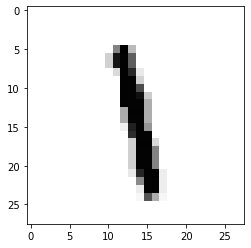

예측 결과는  [1]


In [8]:
import matplotlib.pylab as plt

n = 1004

plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

print('예측 결과는 ', model.predict_classes(x_test[n].reshape((1, 28, 28, 1))))